In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
df = pd.read_csv('/content/drive/My Drive/GSCM/hierarchical_textcluster_newTPE_decisionTree_v2.csv')

# Number of observations and variables
print(data.shape)
# Overview dataset
df.head()

(4221, 8)


,c0101,警衛形式,分類,屋齡,戶數,公設比,近一年實價登錄,平面車位,機械車位,地區,cluster_complete_3,cluster_complete_5,cluster_avg_3,cluster_avg_6,cluster_ward_3,cluster_ward_4
0,1,0,1,6,1,0,1,1,0,0,2,3,1,1,1,2
1,8,0,0,5,1,1,0,1,0,0,2,3,1,1,2,3
2,10,0,1,5,3,0,1,1,1,0,2,3,1,1,1,2
3,11,1,0,5,1,1,1,0,0,0,3,4,1,1,1,1
4,12,0,1,5,3,1,0,1,0,0,2,3,1,1,1,2


In [26]:
#data['content'] = data.drop('c0101')
labels = np.array(df['c0101'])
X=df.iloc[:,1:9]
#data=pd.DataFrame(data)
data.head()

,警衛形式,分類,屋齡,戶數,公設比,近一年實價登錄,平面車位,機械車位
0,0,1,6,1,0,1,1,0
1,0,0,5,1,1,0,1,0
2,0,1,5,3,0,1,1,1
3,1,0,5,1,1,1,0,0
4,0,1,5,3,1,0,1,0


In [10]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [24]:
import numpy as np
y=df.iloc[:,10:11]
y.head()

,cluster_complete_3
0,2
1,2
2,2
3,3
4,2


In [27]:
print(X.dtypes)

categorical_features_indices = np.where(X.dtypes != float)[0]

警衛形式       int64
分類         int64
屋齡         int64
戶數         int64
公設比        int64
近一年實價登錄    int64
平面車位       int64
機械車位       int64
dtype: object


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

In [29]:
model = CatBoostClassifier(
    custom_loss = ['Accuracy'],
    random_seed = 100,
    loss_function = 'MultiClass'
)

In [30]:
model.fit(
    X_train, y_train,
    cat_features = categorical_features_indices,
    verbose = True,  # you can uncomment this for text output
    #plot = True
)

Learning rate set to 0.083621
0:	learn: 0.9821369	total: 58.3ms	remaining: 58.3s
1:	learn: 0.8911269	total: 70ms	remaining: 34.9s
2:	learn: 0.8155556	total: 75.8ms	remaining: 25.2s
3:	learn: 0.7515171	total: 85.1ms	remaining: 21.2s
4:	learn: 0.6990046	total: 93.9ms	remaining: 18.7s
5:	learn: 0.6525910	total: 103ms	remaining: 17.1s
6:	learn: 0.6098176	total: 113ms	remaining: 16s
7:	learn: 0.5728146	total: 122ms	remaining: 15.1s
8:	learn: 0.5398113	total: 131ms	remaining: 14.5s
9:	learn: 0.5108645	total: 141ms	remaining: 13.9s
10:	learn: 0.4851994	total: 150ms	remaining: 13.5s
11:	learn: 0.4620380	total: 160ms	remaining: 13.1s
12:	learn: 0.4406805	total: 169ms	remaining: 12.8s
13:	learn: 0.4208898	total: 180ms	remaining: 12.6s
14:	learn: 0.4047302	total: 188ms	remaining: 12.4s
15:	learn: 0.3904904	total: 198ms	remaining: 12.2s
16:	learn: 0.3762147	total: 210ms	remaining: 12.1s
17:	learn: 0.3644074	total: 219ms	remaining: 11.9s
18:	learn: 0.3527764	total: 228ms	remaining: 11.8s
19:	learn:

In [34]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),columns=['Feature','Score'])
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [39]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
font = 'TaipeiSansTCBeta-Regular.ttf'
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = font

--2022-04-23 11:35:04--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.122.139, 172.253.122.101, 172.253.122.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ktjrepdiequlbct0ijn1hf0dgj8evs7v/1650713700000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-23 11:35:04--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ktjrepdiequlbct0ijn1hf0dgj8evs7v/1650713700000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.31

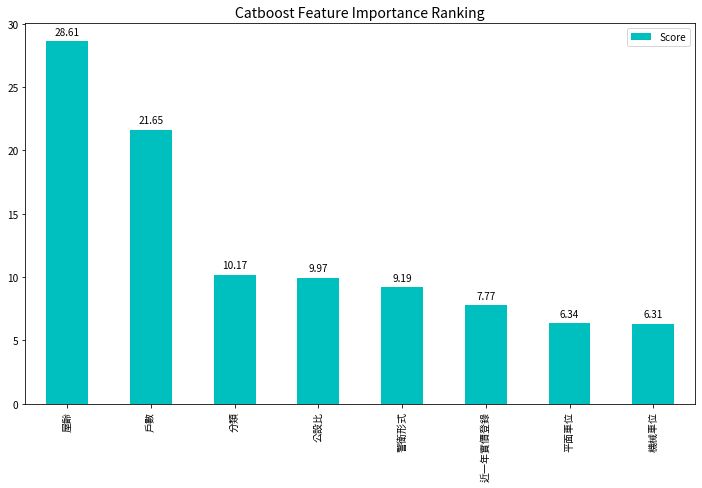

In [54]:

plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

# get feature score as labels round to 2 decimal
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [41]:
model.score(X_test, y_test)

0.9771112865035517

In [42]:
model = CatBoostClassifier(
    l2_leaf_reg = 3,
    iterations = 1000,
    fold_len_multiplier = 1.05,
    learning_rate = 0.05,
    custom_loss = ['Accuracy'],
    random_seed = 100,
    loss_function = 'MultiClass'
)


In [43]:
model.fit(
    X_train, y_train,
    cat_features = categorical_features_indices,
    verbose = True,  # you can uncomment this for text output
    #plot = True
)


0:	learn: 1.0277317	total: 19.3ms	remaining: 19.3s
1:	learn: 0.9669109	total: 68.7ms	remaining: 34.3s
2:	learn: 0.9125281	total: 91.1ms	remaining: 30.3s
3:	learn: 0.8636903	total: 107ms	remaining: 26.6s
4:	learn: 0.8211787	total: 119ms	remaining: 23.7s
5:	learn: 0.7819816	total: 131ms	remaining: 21.7s
6:	learn: 0.7463394	total: 146ms	remaining: 20.7s
7:	learn: 0.7139511	total: 157ms	remaining: 19.4s
8:	learn: 0.6846341	total: 168ms	remaining: 18.5s
9:	learn: 0.6577045	total: 189ms	remaining: 18.7s
10:	learn: 0.6314587	total: 214ms	remaining: 19.3s
11:	learn: 0.6073652	total: 242ms	remaining: 19.9s
12:	learn: 0.5845146	total: 260ms	remaining: 19.7s
13:	learn: 0.5626479	total: 279ms	remaining: 19.6s
14:	learn: 0.5430424	total: 309ms	remaining: 20.3s
15:	learn: 0.5250924	total: 335ms	remaining: 20.6s
16:	learn: 0.5079490	total: 359ms	remaining: 20.8s
17:	learn: 0.4925606	total: 391ms	remaining: 21.3s
18:	learn: 0.4772532	total: 427ms	remaining: 22.1s
19:	learn: 0.4648987	total: 449ms	rema

In [45]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

In [46]:
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [52]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-04-23 11:40:37--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.115.102, 172.253.115.113, 172.253.115.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/amqtis7rfqka9ccu1b48t7rjhh6nkrnr/1650714000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-23 11:40:38--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/amqtis7rfqka9ccu1b48t7rjhh6nkrnr/1650714000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.31

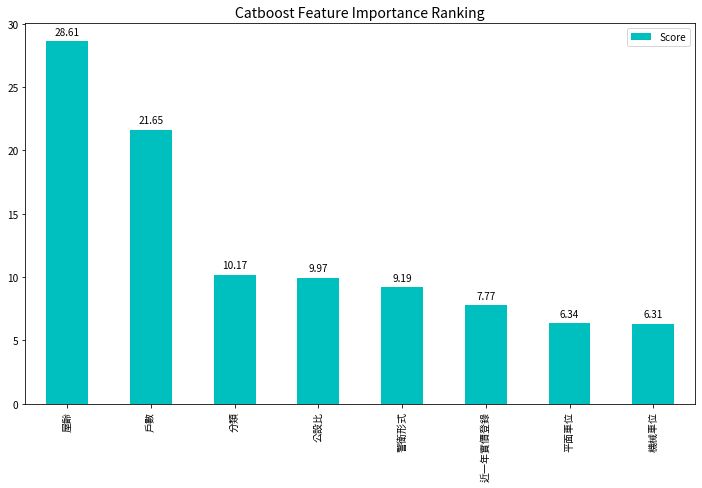

In [53]:

plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

# get feature score as labels round to 2 decimal
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()
#plt.savefig("image.png")

In [48]:
cm = pd.DataFrame()
cm['Satisfaction'] = y_test
cm['Predict'] = model.predict(X_test)

In [49]:
mappingSatisfaction = {0:'Unsatisfied', 1: 'Neutral', 2: 'Satisfied'}
mappingPredict = {0.0:'Unsatisfied', 1.0: 'Neutral', 2.0: 'Satisfied'}
cm = cm.replace({'Satisfaction': mappingSatisfaction, 'Predict': mappingPredict})

In [50]:
pd.crosstab(cm['Satisfaction'], cm['Predict'], margins=True)

Predict,3,Neutral,Satisfied,All
Satisfaction,,,,
3,223,2,7,232
Neutral,2,723,1,726
Satisfied,9,5,295,309
All,234,730,303,1267


In [51]:
model.score(X_test, y_test)

0.9794790844514601